## VISUALIZACIÓN DE LOS DATOS

El objetivo es proporcionar a ABC Corporation un informe detallado del contexto general de la empresa utilizando visualizaciones en Python junto con análisis descriptivos donde se resaltaremos tendencias, áreas de mejora y fortalezas dentro de la empresa. Este informe permitirá una comprensión más profunda de la situación actual y servirá como base para la toma de decisiones informadas.


In [1]:
# importamos las librerías que necesitaremos

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualización de datos en gráficas
# -----------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluar linealidad de las relaciones entre las variables
# y la distribución de las variables
# ------------------------------------------------------------------------------
#import scipy.stats as stats
import scipy.stats as stats
from scipy.stats import shapiro, poisson, chisquare, expon, kstest


# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

In [2]:
df = pd.read_csv("CSV_LIMPIADO.csv", index_col=0)
df.head(2)

,attrition,businesstravel,dailyrate,department,distancefromhome,education,educationfield,employeecount,employeenumber,environmentsatisfaction,gender,hourlyrate,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,monthlyincome,monthlyrate,numcompaniesworked,over18,overtime,percentsalaryhike,performancerating,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager,sameasmonthlyincome,datebirth,salary,roledepartament,numberchildren,remotework
age,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
51,no,NaN,2015.72,NaN,6,3,NaN,1,1,1,male,NaN,3,5,research director,3,NaN,16280.83,42330.17,7,y,no,13,3.0,3,full time,0,NaN,5,3.0,20,NaN,15,15,16280.83,1972,195370.0,NaN,NaN,yes
52,no,NaN,2063.39,NaN,1,4,life sciences,1,2,3,male,NaN,2,5,manager,3,NaN,NaN,43331.17,0,y,NaN,14,3.0,1,NaN,1,34.0,5,3.0,33,NaN,11,9,NaN,1971,199990.0,NaN,NaN,yes


In [3]:
print(f"El número de filas que tenemos es {df.shape[0]}, y el número de columnas es {df.shape[1]}")
print("Nota: La columna Age no se cuenta en .shape porque es el índice, pero también forma parte del DataFrame.")

El número de filas que tenemos es 1678, y el número de columnas es 40
Nota: La columna Age no se cuenta en .shape porque es el índice, pero también forma parte del DataFrame.


In [4]:
df = df.reset_index()

In [5]:
df.head(2)

,age,attrition,businesstravel,dailyrate,department,distancefromhome,education,educationfield,employeecount,employeenumber,environmentsatisfaction,gender,hourlyrate,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,monthlyincome,monthlyrate,numcompaniesworked,over18,overtime,percentsalaryhike,performancerating,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager,sameasmonthlyincome,datebirth,salary,roledepartament,numberchildren,remotework
0,51,no,NaN,2015.72,NaN,6,3,NaN,1,1,1,male,NaN,3,5,research director,3,NaN,16280.83,42330.17,7,y,no,13,3.0,3,full time,0,NaN,5,3.0,20,NaN,15,15,16280.83,1972,195370.0,NaN,NaN,yes
1,52,no,NaN,2063.39,NaN,1,4,life sciences,1,2,3,male,NaN,2,5,manager,3,NaN,NaN,43331.17,0,y,NaN,14,3.0,1,NaN,1,34.0,5,3.0,33,NaN,11,9,NaN,1971,199990.0,NaN,NaN,yes


In [6]:
print(f"El número de filas que tenemos es {df.shape[0]}, y el número de columnas es {df.shape[1]}")

El número de filas que tenemos es 1678, y el número de columnas es 41


### ENFOQUE GENERAL DE LA EMPRESA

Se valorarán datos demográficos de los 1614 empleados de la empresa ABC Corporation en el conjunto de datos, revisando su edad media, género, edad media por género, nivel formativo en general, nivel formativo por género y su estado civil.

### Número de empleados

La empresa tiene 1614 empleados

In [7]:
df['employeenumber'].unique()

array([   1,    2,    3, ..., 1612, 1613, 1614], shape=(1614,))

In [8]:
df['employeenumber'].duplicated().sum()
# tenemos 64 registros duplicados (más de una consulta por empleado)

np.int64(64)

In [9]:
df_sin_duplicados = df.drop_duplicates(subset='employeenumber')
# eliminamos los duplicados por asegurarnos

In [10]:
df_sin_duplicados.duplicated().sum()

np.int64(0)

In [11]:
df_sin_duplicados['employeenumber'].unique()

array([   1,    2,    3, ..., 1612, 1613, 1614], shape=(1614,))

### EDAD MEDIA DE LOS EMPLEADOS

La edad media de los empleados es de casi 37 años (36,92), con empleados entre los 18 años y los 60 años de máximo.

In [12]:
df_sin_duplicados['age'].describe()

count    1614.000000
mean       36.920694
std         9.102157
min        18.000000
25%        30.000000
50%        36.000000
75%        43.000000
max        60.000000
Name: age, dtype: float64

Text(0.5, 1.0, 'Histplot con el Número de empleados por edad')

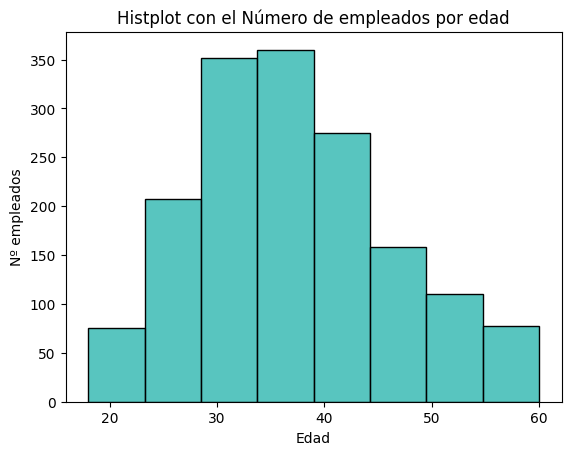

In [13]:
sns.histplot(data=df_sin_duplicados, x='age', bins=8, color='lightseagreen')
plt.xlabel("Edad")
plt.ylabel("Nº empleados")
plt.title('Histplot con el Número de empleados por edad', fontsize=12)

### GÉNERO DE LOS EMPLEADOS

El género de los empleados es mayoritariamente masculino (60,16%), con 971 hombres y 643 mujeres.

In [14]:
df_sin_duplicados['gender'].value_counts()

gender
male      971
female    643
Name: count, dtype: int64

In [15]:
round(df_sin_duplicados['gender'].value_counts(normalize=True) * 100, 2)

gender
male      60.16
female    39.84
Name: proportion, dtype: float64

Text(0.5, 1.0, 'Countplot con el Número de empleados por género')

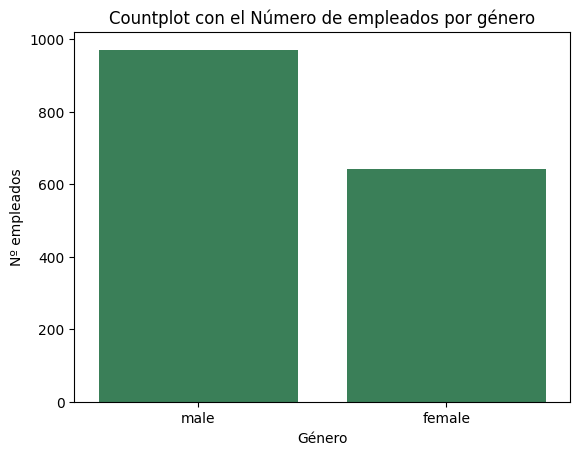

In [16]:
sns.countplot(data=df_sin_duplicados, x='gender', color='seagreen')
plt.xlabel("Género")
plt.ylabel("Nº empleados")
plt.title('Countplot con el Número de empleados por género', fontsize=12)

### EDAD MEDIA POR GÉNERO DE LOS EMPLEADOS

La edad media de los empleados por género es casi la misma, con una edad media de 36,7 años los hombres y con una media de 37,26 años las mujeres.

In [17]:
df_sin_duplicados.groupby('gender')['age'].mean()

gender
female    37.259720
male      36.696189
Name: age, dtype: float64

In [18]:
df_género_edad = round(df_sin_duplicados.groupby('gender')['age'].mean(), 2).reset_index()
df_género_edad

,gender,age
0,female,37.26
1,male,36.70


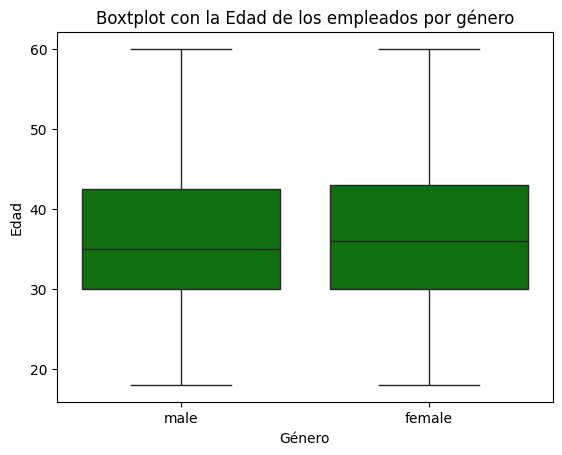

In [19]:
sns.boxplot(x='gender', y='age', data=df_sin_duplicados, color='green')
plt.xlabel("Género")
plt.ylabel("Edad")
plt.title('Boxtplot con la Edad de los empleados por género', fontsize=12);

### NIVEL FORMATIVO DE LOS EMPLEADOS

El nivel formativo de los empleados es principalmente Desconocido (745 empleados), siguiéndole life sciences (349 empleados), medical (276 empleados), marketing (104 empleados), technical degree (69 empleados), other (59 empleados) y human resources (12 empleados).

In [20]:
df_sin_duplicados['educationfield'].unique()

array([nan, 'life sciences', 'technical degree', 'medical', 'other',
       'marketing', 'human resources'], dtype=object)

In [21]:
df_sin_duplicados['educationfield'].describe()

count               869
unique                6
top       life sciences
freq                349
Name: educationfield, dtype: object

In [22]:
df_sin_duplicados['educationfield'].value_counts()

educationfield
life sciences       349
medical             276
marketing           104
technical degree     69
other                59
human resources      12
Name: count, dtype: int64

Text(0.5, 1.0, 'Countplot con el Número de empleados por nivel formativo')

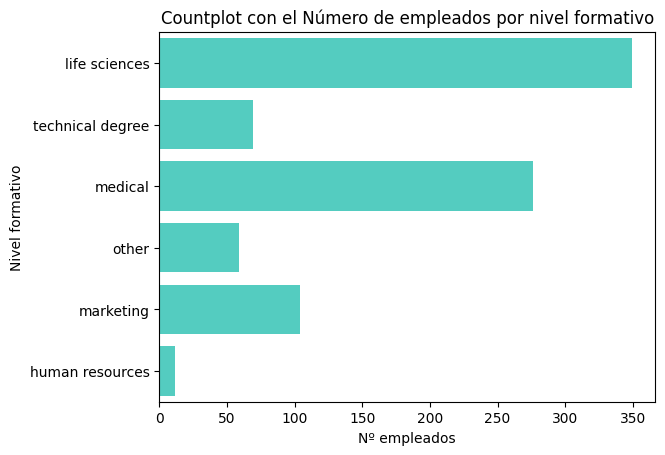

In [23]:
sns.countplot(data=df_sin_duplicados, y='educationfield', color='turquoise')
plt.xlabel("Nº empleados")
plt.ylabel("Nivel formativo")
plt.title('Countplot con el Número de empleados por nivel formativo', fontsize=12)

## 🏢 Departamentos y Puestos

La empresa está compuesta por 3 departamentos principales con una amplia variedad de roles.

**Departamentos:**

- Research & Development
- Sales
- Human Resources

**Puestos destacados en múltiples departamentos:**

- Manager
- Research Director
- Laboratory Technician
- Sales Executive
- Human Resources Coordinator

## 💼 Salario por Departamento y Rol

El salario medio por departamento no presenta diferencias extremas.

**Sin embargo:**

- Los Managers tienen salarios significativamente más altos que el resto.
- El rol de Research Director también destaca por tener un sueldo elevado, aunque no sea un puesto de gestión formal.

C:\Users\SOL\AppData\Local\Temp\ipykernel_13332\1434841671.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


Text(0, 0.5, 'Salario medio')

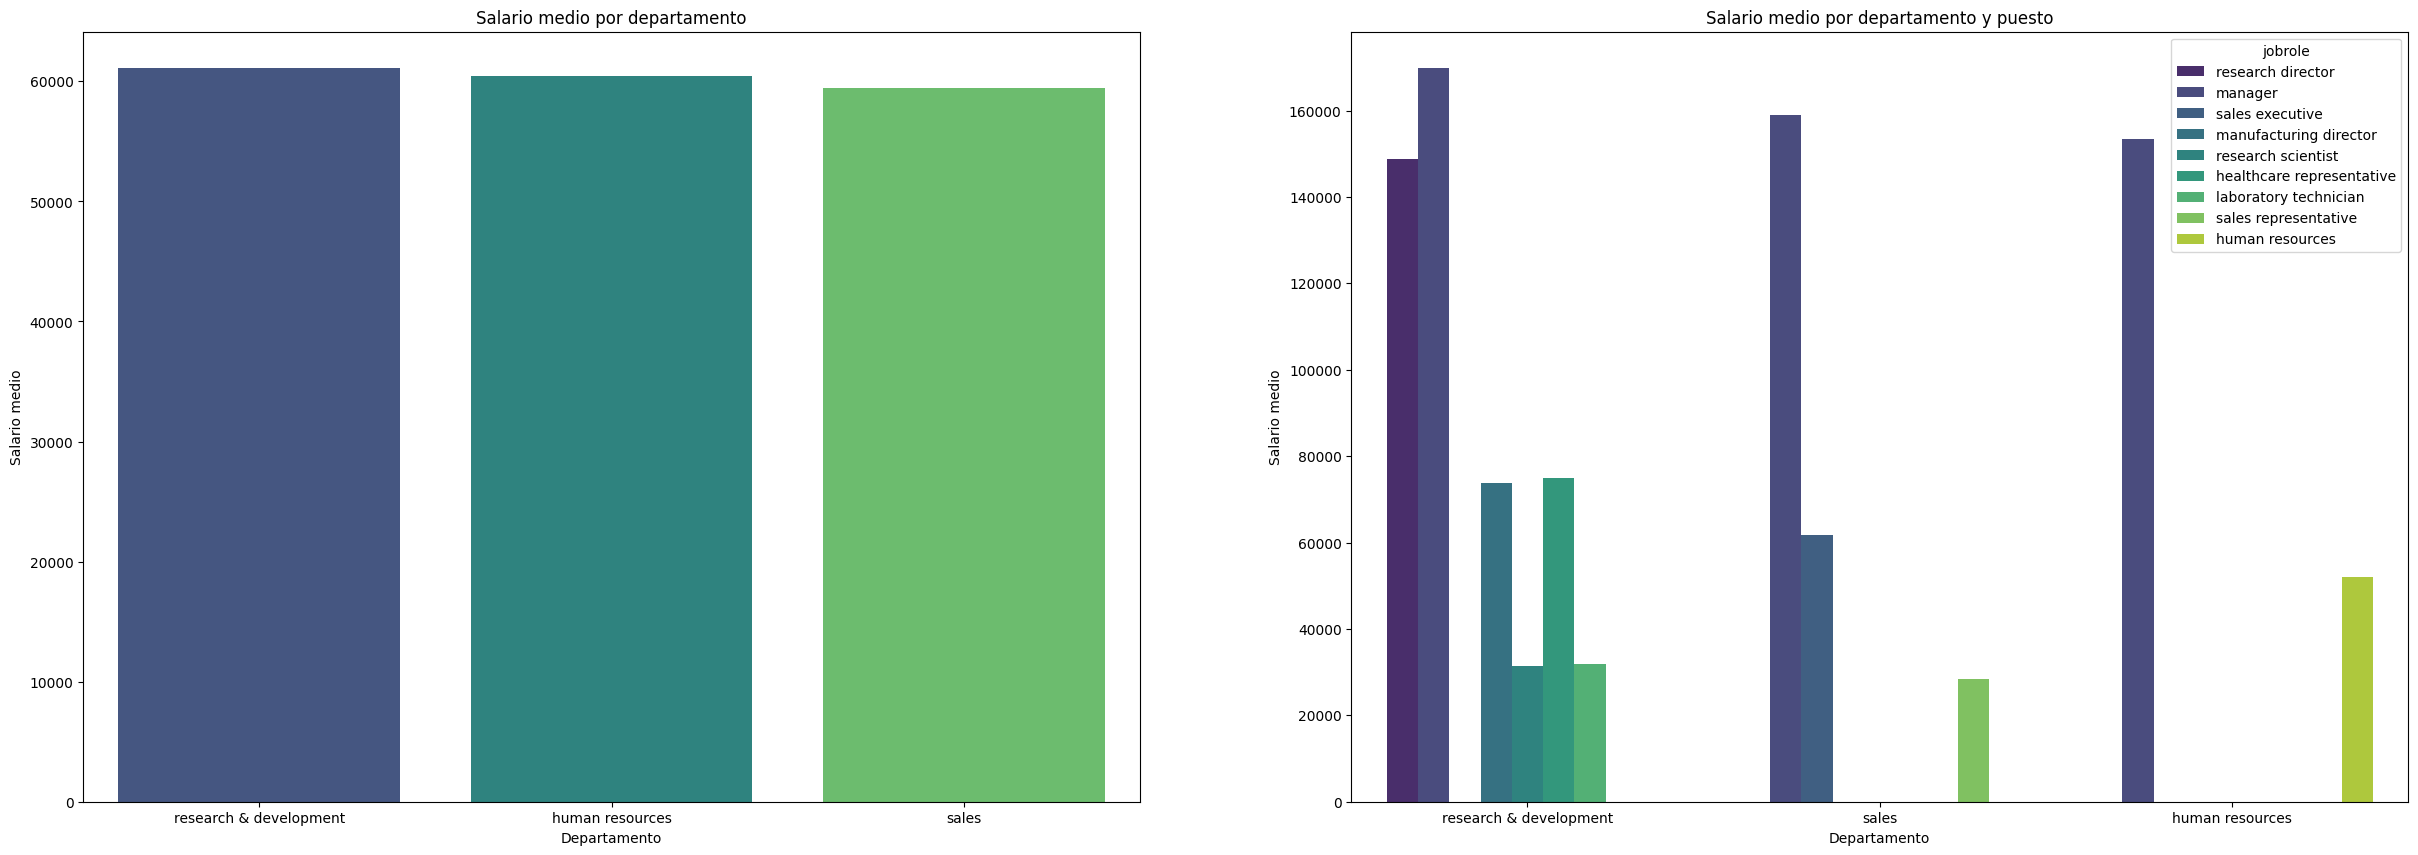

In [24]:
orden = df_sin_duplicados.groupby("department")["salary"].mean().sort_values(ascending=False).index
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (30, 10))
sns.barplot(x="department", 
            y="salary",
            data=df_sin_duplicados,
            hue='jobrole', 
            errorbar=None,
            palette="viridis",
            ax = axes[1]) 
axes[1].set_title("Salario medio por departamento y puesto")
axes[1].set_xlabel("Departamento")
axes[1].set_ylabel("Salario medio")

sns.barplot(
    x="department", 
    y="salary", 
    data=df_sin_duplicados, 
    errorbar=None,    
    order=orden,     
    palette="viridis", 
    ax = axes[0])
axes[0].set_title("Salario medio por departamento")
axes[0].set_xlabel("Departamento")
axes[0].set_ylabel("Salario medio")

## 👩‍💼👨‍💼 Género y Salario

En la mayoría de los departamentos, el salario medio entre hombres y mujeres es similar.

**Excepción importante:**

- En el departamento de Recursos Humanos, las mujeres ganan menos que los hombres de forma significativa.

Text(0, 0.5, 'salario')

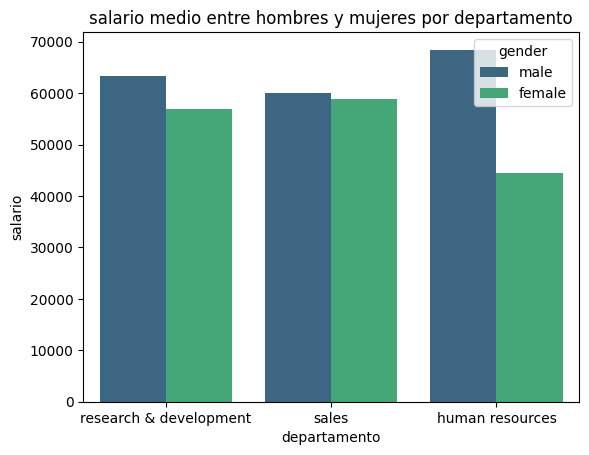

In [25]:
sns.barplot(x="department", 
            y="salary",
            data=df_sin_duplicados,
            hue='gender', 
            errorbar=None,
            palette="viridis")
plt.title("salario medio entre hombres y mujeres por departamento")
plt.xlabel("departamento")
plt.ylabel("salario")

## 🎓 Nivel Educativo y Salario

El nivel educativo se mide en una escala de 1 a 5 (1 = menor nivel, 5 = nivel más alto).

Existe una correlación positiva clara:

- A mayor nivel educativo, mayor es el salario promedio.

Text(0, 0.5, 'salario')

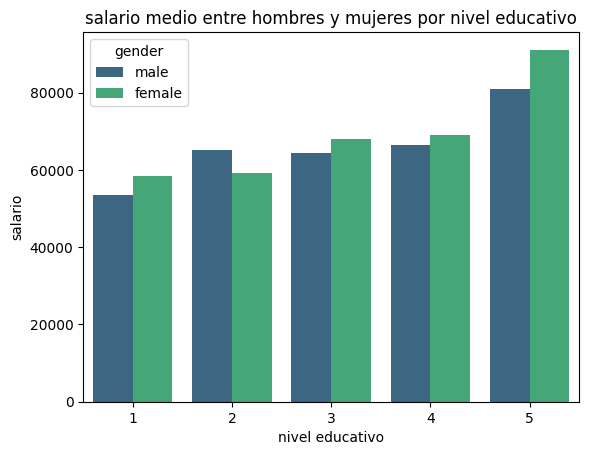

In [26]:
sns.barplot(x="education", 
            y="salary",
            data=df_sin_duplicados,
            hue='gender',
            estimator='mean', 
            errorbar=None,
            palette="viridis")
plt.title("salario medio entre hombres y mujeres por nivel educativo")
plt.xlabel("nivel educativo")
plt.ylabel("salario")

## 🏠 Distancia al Trabajo

- 38.4% de los empleados vive a 5 millas o menos del trabajo.
- 61.6% vive a más de 5 millas, lo que puede afectar:
  - Bienestar
  - Productividad
  - Rotación

C:\Users\SOL\AppData\Local\Temp\ipykernel_13332\811048589.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sin_duplicados["distancia_categoria"] = df_sin_duplicados["distancefromhome"].apply(lambda x: "Cerca" if x <= 5 else "Lejos")


Text(0.5, 1.0, 'Distribución de empleados según la distancia al trabajo')

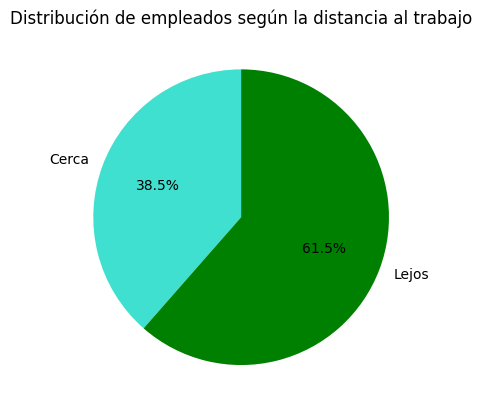

In [27]:
df_sin_duplicados["distancia_categoria"] = df_sin_duplicados["distancefromhome"].apply(lambda x: "Cerca" if x <= 5 else "Lejos")
df_distancia = df_sin_duplicados.groupby("distancia_categoria")["employeecount"].count().reset_index()
import matplotlib.pyplot as plt

colores = ['turquoise', 'green']

plt.pie(
    df_distancia["employeecount"], 
    labels=df_distancia["distancia_categoria"],
    autopct='%1.1f%%', 
    colors=colores, 
    textprops={'fontsize': 10}, 
    startangle=90
)
plt.title("Distribución de empleados según la distancia al trabajo")

## ⏳ Antigüedad en la Empresa

- 13.6% lleva menos de 2 años.
- 69.9% lleva entre 2 y 10 años.
- 16.5% lleva más de 10 años, y este grupo recibe el salario más alto en promedio.

In [28]:
def clasificar_antiguedad(x):
    if x < 2:
        return "Menos de 2 años"
    elif x <= 10:
        return "De 2 a 10 años"
    else:
        return "Más de 10 años"

df_sin_duplicados["antiguedad_categoria"] = df_sin_duplicados["yearsatcompany"].apply(clasificar_antiguedad)

C:\Users\SOL\AppData\Local\Temp\ipykernel_13332\3609187049.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sin_duplicados["antiguedad_categoria"] = df_sin_duplicados["yearsatcompany"].apply(clasificar_antiguedad)


Text(0.5, 1.0, 'Distribución de empleados por antigüedad en la empresa')

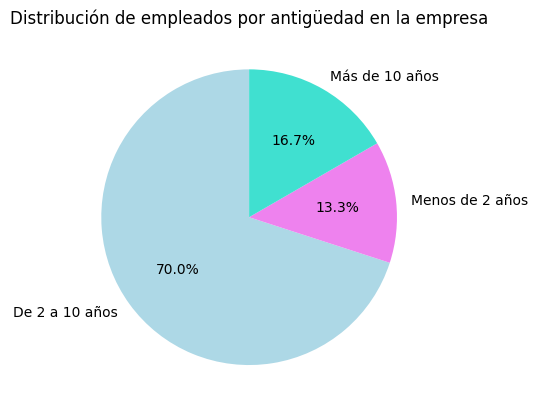

In [29]:
df_antiguedad = df_sin_duplicados.groupby("antiguedad_categoria")["employeecount"].count().reset_index()
colores = ['lightblue', 'violet', 'turquoise']

plt.pie(
    df_antiguedad["employeecount"],
    labels=df_antiguedad["antiguedad_categoria"],
    autopct='%1.1f%%',
    colors=colores,
    textprops={'fontsize': 10},
    startangle=90
)
plt.title("Distribución de empleados por antigüedad en la empresa")

## 🖥️ Teletrabajo

- 62.1% de los empleados trabaja en remoto.
- 37.9% no teletrabaja, lo que podría estar vinculado a:
  - La naturaleza del puesto
  - Políticas internas del área
## ¿Del 61.5% que vive a más de 5 millas, cuántos teletrabajan?
Empleados que viven a más de 5 millas y sí teletrabajan: 596

Porcentaje dentro de los que viven lejos: ≈ 60.02%

✔️ Entonces sí, aproximadamente el 60% de quienes viven lejos están teletrabajando, lo cual puede ayudar a compensar esa distancia.

(np.float64(-1.099999174814268),
 np.float64(1.099995152177627),
 np.float64(-1.0999983253706687),
 np.float64(1.0999999202557462))

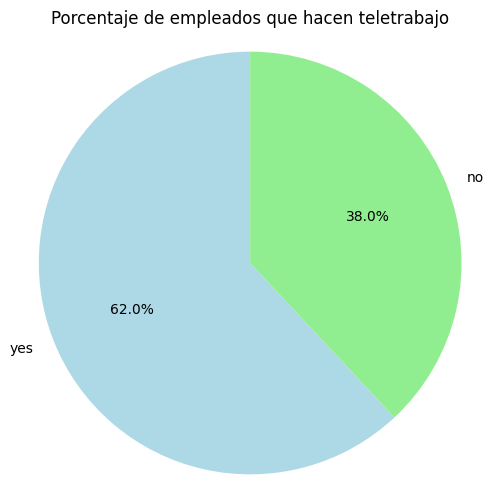

In [30]:
remote_counts = df_sin_duplicados['remotework'].value_counts()
import matplotlib.pyplot as plt

labels = remote_counts.index
sizes = remote_counts.values
colors = ['lightblue', 'lightgreen']  

plt.figure(figsize=(6, 6))
plt.pie(
    sizes, 
    labels=labels, 
    autopct='%1.1f%%', 
    startangle=90, 
    colors=colors, 
    textprops={'fontsize': 10}
)
plt.title("Porcentaje de empleados que hacen teletrabajo")
plt.axis('equal')  # Hace el gráfico circular

## 🧠 Experiencia Media

Hombres y mujeres tienen una experiencia laboral media similar: ~11 años.

Con la experiencia aumenta:

- Salario
- Nivel del puesto

C:\Users\SOL\AppData\Local\Temp\ipykernel_13332\531960543.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
C:\Users\SOL\AppData\Local\Temp\ipykernel_13332\531960543.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


([0, 1, 2],
 [Text(0, 0, 'Más de 10 años'),
  Text(1, 0, 'De 2 a 10 años'),
  Text(2, 0, 'Menos de 2 años')])

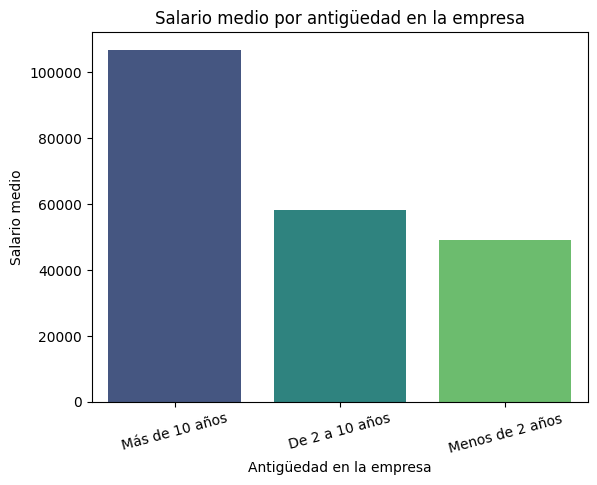

In [31]:
sns.barplot(
    x="antiguedad_categoria",
    y="salary",
    data=df_sin_duplicados,
    estimator="mean",
    ci=None,
    palette="viridis"  # puedes cambiar a otro como 'magma', 'Set2', etc.
)
plt.title("Salario medio por antigüedad en la empresa")
plt.xlabel("Antigüedad en la empresa")
plt.ylabel("Salario medio")
plt.xticks(rotation=15)

## 📈 Evaluación del Desempeño vs. Entrenamiento

No se observa una correlación significativa entre:

- Las sesiones de entrenamiento y la evaluación del desempeño.
- La formación recibida y el salario obtenido.

Text(0, 0.5, 'Promedio de sesiones de entrenamiento')

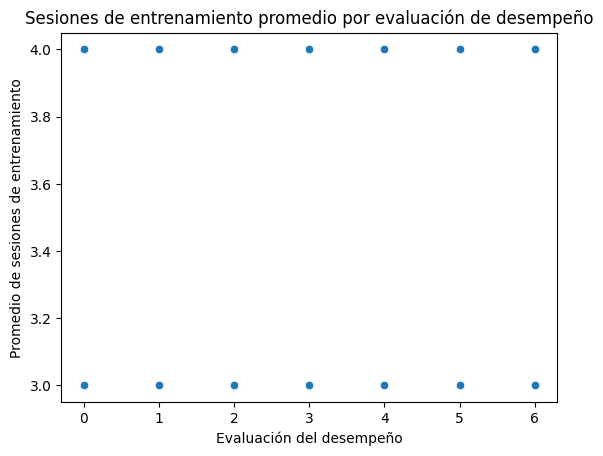

In [32]:
sns.scatterplot(
    x='trainingtimeslastyear',
    y='performancerating',
    data=df
)
plt.title('Sesiones de entrenamiento promedio por evaluación de desempeño')
plt.xlabel('Evaluación del desempeño')
plt.ylabel('Promedio de sesiones de entrenamiento')

In [33]:
df['attrition'] = df['attrition'].map({'no': 'Permanece', 'yes': 'Se fue'})
df['remotework'] = df['remotework'].map({'no': 'No', 'yes': 'Sí'})
df['gender'] = df['gender'].str.capitalize()
df['department'] = df['department'].str.strip().str.capitalize()
df['yearsincurrentrole'] = pd.to_numeric(df['yearsincurrentrole'], errors='coerce')

# JOB SATISFACTION

## ESTADÍSTICAS PRINCIPALES

Media de jobsatisfaction: 2.74/4

Media de jobsatisfaction por género: mujeres: 2.69/4, hombres: 2.77/4

Media de jobsatisfaction por departamento: HR = 2.31/4, Research & Development = 2.86/4, Sales = 2.72/4

In [34]:
media = df['jobsatisfaction'].mean()
media

np.float64(2.743146603098927)

In [35]:
media_por_genero = df.groupby('gender')['jobsatisfaction'].mean()
print(media_por_genero)

gender
Female    2.690583
Male      2.777998
Name: jobsatisfaction, dtype: float64


In [36]:
media_por_genero = df.groupby('remotework')['jobsatisfaction'].mean()
print(media_por_genero)

remotework
No    2.688679
Sí    2.776392
Name: jobsatisfaction, dtype: float64


## JOB SATISFACTION POR GÉNERO

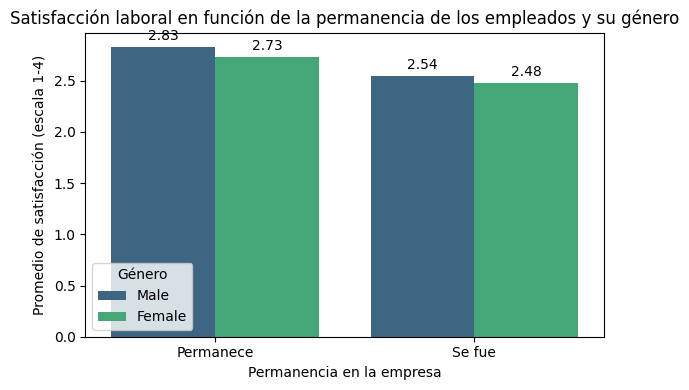

In [37]:


# Subconjunto con columnas necesarias
satisfaction_cols = [
    'attrition', 'gender', 'jobsatisfaction'
]
df_sat = df[satisfaction_cols].dropna()

plt.figure(figsize=(6, 4))
ax = sns.barplot(  # ← asignamos a ax
    data=df_sat,
    x='attrition',
    y='jobsatisfaction',
    hue='gender',
    palette='viridis',
    errorbar=None
)

plt.title("Satisfacción laboral en función de la permanencia de los empleados y su género")
plt.xlabel("Permanencia en la empresa")
plt.ylabel("Promedio de satisfacción (escala 1-4)")
plt.legend(title='Género')

# Añadir etiquetas con valores a cada barra
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', padding=3)

plt.tight_layout()
plt.show()

Conclusión: La satisfacción tiende a ser más baja entre los empleados que ya no trabajan en la empresa, independientemente del género.

## JOB SATISFACTION POR SALARIO

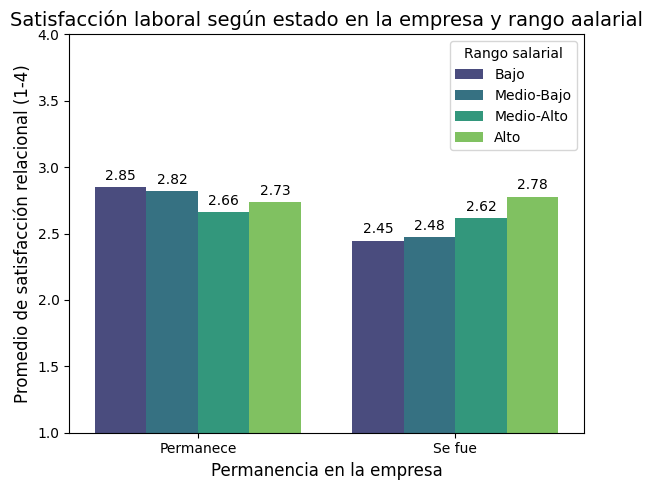

In [38]:
# Agrupar los salarios
df['salary_range'] = pd.qcut(df['salary'], q=4, labels=['Bajo', 'Medio-Bajo', 'Medio-Alto', 'Alto'])

# Eliminar filas con valores nulos en las columnas necesarias
df_salary = df[['attrition', 'salary_range', 'jobsatisfaction']].dropna()

# Gráfico de barras
plt.figure(figsize=(6,5))
ax = sns.barplot(
    data=df_salary,
    x='attrition',
    y='jobsatisfaction',
    hue='salary_range',
    palette='viridis', 
    errorbar=None
)

# Añadir etiquetas con valores a cada barra
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', padding=3)

# Personalizar gráfico
ax.set_title("Satisfacción laboral según estado en la empresa y rango aalarial", fontsize=14)
ax.set_xlabel("Permanencia en la empresa", fontsize=12)
ax.set_ylabel("Promedio de satisfacción relacional (1-4)", fontsize=12)
ax.legend(title='Rango salarial')
ax.set_ylim(1, 4)  # Fijamos los límites del eje Y para mejorar la comparación

plt.tight_layout()
plt.show()

Quienes permanecen generalmente muestran una mayor satisfacción con el trabajo, salvo en los casos de aquellos empleados que tenían los salarios más altos.

## JOB SATISFACTION POR DEPARTAMENTO

In [1]:

# Limpiar valores para visualización
df['department'] = df['department'].str.strip().str.capitalize()

# Seleccionar columnas necesarias y quitar nulos
df_dep = df[['attrition', 'department', 'jobsatisfaction']].dropna()

# Crear gráfico
plt.figure(figsize=(6,5))
ax = sns.barplot(
    data=df_dep,
    x='department',
    y='jobsatisfaction',
    hue='attrition',
    palette='viridis',
    errorbar=None
)

# Añadir etiquetas con valores a cada barra
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', padding=3)

# Títulos y etiquetas
ax.set_title("Satisfacción laboral por departamento y estatus de permanencia en la empresa", fontsize=14)
ax.set_xlabel("Departamento", fontsize=10)
ax.set_ylabel("Promedio de satisfacción con el trabajo", fontsize=10)
ax.legend(title='Attrition')

# Rotar etiquetas si es necesario
plt.xticks(rotation=45)

# Mostrar gráfico
plt.tight_layout()
plt.show()

NameError: name 'df' is not defined

La satisfacción con el trabajo es considerablemente más baja entre los empleados inactivos en el departamento de HR y mucho menos notable en el de Ventas. En el Departamento de Investigación y Desarrollo, sin embargo, los empleados inactivos muestran una mejor satisfacción con el trabajo que los activos.

## JOB SATISFACTION POR AÑOS EN EL PUESTO

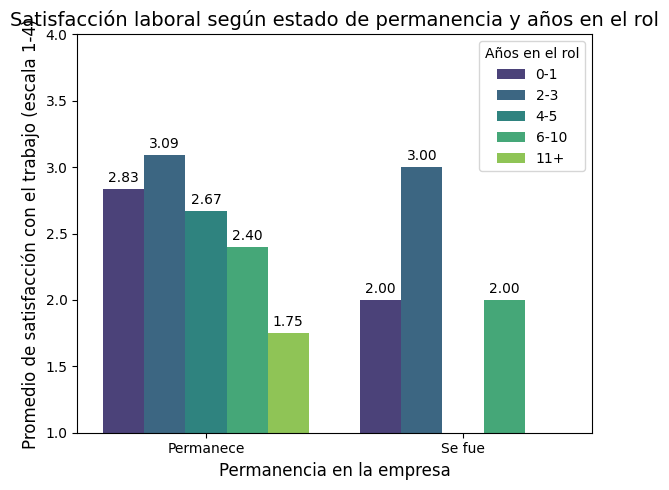

In [40]:

df['yearsincurrentrole'] = pd.to_numeric(df['yearsincurrentrole'], errors='coerce')

# Crear categorías por años en el rol
df['años_en_rol'] = pd.cut(
    df['yearsincurrentrole'],
    bins=[-1, 1, 3, 5, 10, df['yearsincurrentrole'].max()],
    labels=['0-1', '2-3', '4-5', '6-10', '11+']
)

# Filtrar y limpiar
df_role = df[['attrition', 'años_en_rol', 'jobsatisfaction']].dropna()

# Crear gráfico
plt.figure(figsize=(6,5))
ax = sns.barplot(
    data=df_role,
    x='attrition',
    y='jobsatisfaction',
    hue='años_en_rol',
    palette='viridis',
    errorbar=None
)

# Añadir etiquetas con valores a cada barra
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', padding=3)

# Etiquetas
ax.set_title("Satisfacción laboral según estado de permanencia y años en el rol", fontsize=14)
ax.set_xlabel("Permanencia en la empresa", fontsize=12)
ax.set_ylabel("Promedio de satisfacción con el trabajo (escala 1-4)", fontsize=12)
ax.legend(title='Años en el rol')
ax.set_ylim(1, 4)

plt.tight_layout()
plt.show()

La satisfacción con el trabajo tiende a ser más alta entre los empleados en activo que llevan entre 2-3 años en su rol. Por otro lado, los grados de satisfacción más bajos se observan entre aquellos empleados que llevan más años en su rol, indicando una posible insatisfacción con su crecimiento profesional.

## JOB SATISFACTION POR AÑOS DESDE EL ÚLTIMO ASCENSO

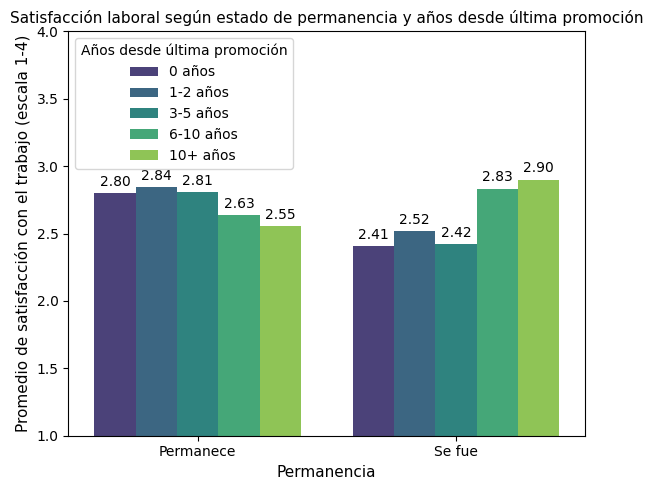

In [41]:
df['promotion_range'] = pd.cut(
    df['yearssincelastpromotion'],
    bins=[-1, 0, 2, 5, 10, df['yearssincelastpromotion'].max()],
    labels=['0 años', '1-2 años', '3-5 años', '6-10 años', '10+ años']
)

df_promo = df[['attrition', 'promotion_range', 'jobsatisfaction']].dropna()


plt.figure(figsize=(6,5))
ax = sns.barplot(
    data=df_promo,
    x='attrition',
    y='jobsatisfaction',
    hue='promotion_range',
    palette='viridis',
    errorbar=None
)

# Añadir etiquetas con valores a cada barra
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', padding=3)

ax.set_title("Satisfacción laboral según estado de permanencia y años desde última promoción", fontsize=11)
ax.set_xlabel("Permanencia", fontsize=11)
ax.set_ylabel("Promedio de satisfacción con el trabajo (escala 1-4)", fontsize=11)
ax.legend(title='Años desde última promoción')
ax.set_ylim(1, 4)  
plt.tight_layout()
plt.show()

Mientras que, entre los empleados en activo se observa una relación negativa entre la satisfacción y los años desde la última promoción, este no es el caso entre el grupo de empleados inactivos.

## JOB SATISFACTION POR TELETRABAJO

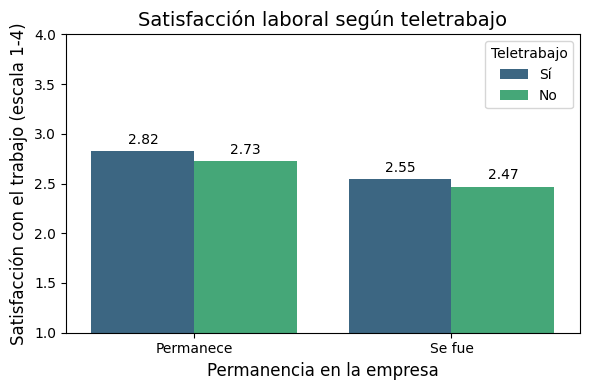

In [42]:
# Eliminar filas con nulos en columnas clave
df_remote = df[['attrition', 'remotework', 'jobsatisfaction']].dropna()

# Crear el barplot
plt.figure(figsize=(6, 4))
ax = sns.barplot(
    data=df_remote,
    x='attrition',
    y='jobsatisfaction',
    hue='remotework',
    palette='viridis',
    errorbar=None,

)

# Añadir etiquetas con valores a cada barra
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', padding=3)

# Personalizar
ax.set_title("Satisfacción laboral según teletrabajo", fontsize=14)
ax.set_xlabel("Permanencia en la empresa", fontsize=12)
ax.set_ylabel("Satisfacción con el trabajo (escala 1-4)", fontsize=12)
ax.legend(title='Teletrabajo')
ax.set_ylim(1, 4)

plt.tight_layout()
plt.show()


El trabajo remoto parece estar asociado con un leve aumento en la satisfacción laboral.

## SATISFACCIÓN AMBIENTAL SEGÚN EL GÉNERO

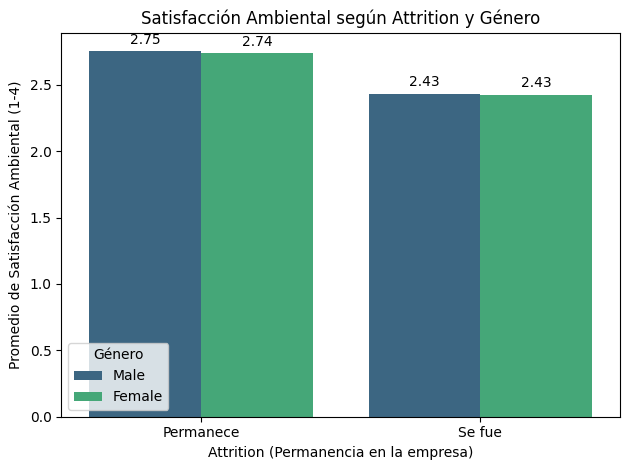

In [43]:
satisfaction_cols = [
    'attrition', 'gender', 'environmentsatisfaction'
]
df_sat = df[satisfaction_cols].dropna()

# Barplot: Eje x = Attrition, Eje y = Satisfacción relacional, hue = Género
ax = sns.barplot(
    data=df_sat,
    x='attrition',
    y='environmentsatisfaction',
    hue='gender',
    palette='viridis',
    errorbar=None
)

plt.title("Satisfacción Ambiental según Attrition y Género")
plt.xlabel("Attrition (Permanencia en la empresa)")
plt.ylabel("Promedio de Satisfacción Ambiental (1-4)")
plt.legend(title='Género')

# Añadir etiquetas con valores a cada barra
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', padding=3)

plt.tight_layout()
plt.show()

Tanto hombres como mujeres que permanecen en la empresa muestran niveles más altos de satisfacción ambiental.

La diferencia por género es mínima, lo que sugiere que el género no es un gran factor diferenciador en satisfacción ambiental.

## SATISFACCIÓN RELACIONAL POR GÉNERO

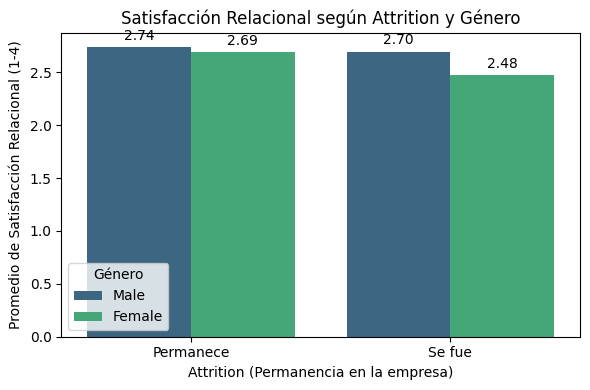

In [44]:
satisfaction_cols = [
    'attrition', 'gender', 'relationshipsatisfaction'
]
df_sat = df[satisfaction_cols].dropna()

# Barplot: Eje x = Attrition, Eje y = Satisfacción relacional, hue = Género
plt.figure(figsize=(6, 4))
ax = sns.barplot(data=df_sat, x='attrition', y='relationshipsatisfaction', hue='gender', palette='viridis', errorbar=None)

# Añadir etiquetas con valores a cada barra
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', padding=3)


plt.title("Satisfacción Relacional según Attrition y Género")
plt.xlabel("Attrition (Permanencia en la empresa)")
plt.ylabel("Promedio de Satisfacción Relacional (1-4)")
plt.legend(title='Género')
plt.tight_layout()
plt.show()

- Quienes permanecen muestran una mayor satisfacción relacional.
-  La diferencia de satisfacción por género es ligera. Mayor satisfación entre el género masculino 

## SATISFACCIÓN AMBIENTAL POR DEPARTAMENTO

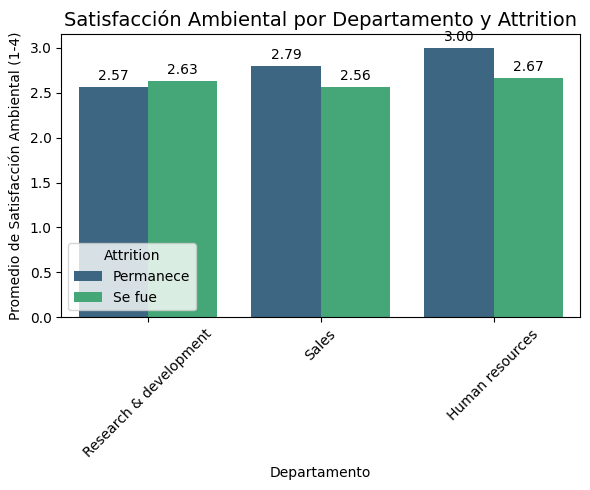

In [45]:
df_dep = df[['attrition', 'department', 'environmentsatisfaction']].dropna()

# 4. Crear gráfico
plt.figure(figsize=(6,5))
ax = sns.barplot(
    data=df_dep,
    x='department',
    y='environmentsatisfaction',
    hue='attrition',
    palette='viridis',
    errorbar=None
)

# Añadir etiquetas con valores a cada barra
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', padding=3)


# 5. Títulos y etiquetas
ax.set_title("Satisfacción Ambiental por Departamento y Attrition", fontsize=14)
ax.set_xlabel("Departamento", fontsize=10)
ax.set_ylabel("Promedio de Satisfacción Ambiental (1-4)", fontsize=10)
ax.legend(title='Attrition')

# 6. Rotar etiquetas si es necesario
plt.xticks(rotation=45)

# 7. Mostrar gráfico
plt.tight_layout()
plt.show()

El Executive Team muestra una caída drástica en satisfacción ambiental entre quienes se fueron.

En todos los departamentos, la satisfacción ambiental tiende a ser menor entre quienes abandonan la empresa.

## SATISFACCIÓN RELACIONAL POR DEPARTAMENTO

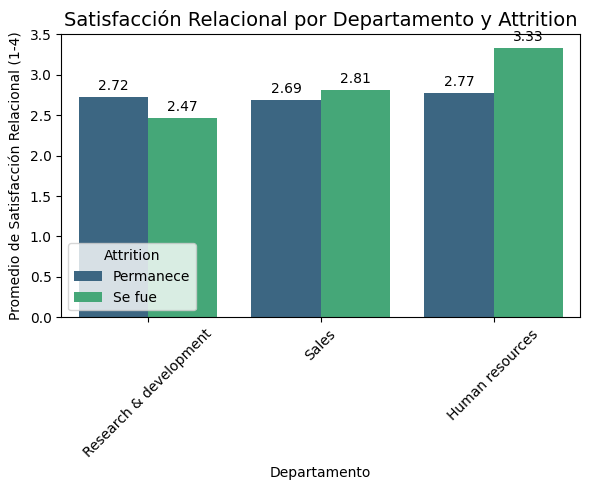

In [46]:
df_dep = df[['attrition', 'department', 'relationshipsatisfaction']].dropna()

# 4. Crear gráfico
plt.figure(figsize=(6,5))
ax = sns.barplot(
    data=df_dep,
    x='department',
    y='relationshipsatisfaction',
    hue='attrition',
    palette='viridis',
    errorbar=None
)

# Añadir etiquetas con valores a cada barra
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', padding=3)

# 5. Títulos y etiquetas
ax.set_title("Satisfacción Relacional por Departamento y Attrition", fontsize=14)
ax.set_xlabel("Departamento", fontsize=10)
ax.set_ylabel("Promedio de Satisfacción Relacional (1-4)", fontsize=10)
ax.legend(title='Attrition')

# 6. Rotar etiquetas si es necesario
plt.xticks(rotation=45)

# 7. Mostrar gráfico
plt.tight_layout()
plt.show()

En la mayoría de los departamentos, las personas que se fueron estaban menos satisfechas relacionalmente.

El caso del Executive Team destaca por ser contrario a esta tendencia, posiblemente por otras razones o tamaño reducido de muestra.

## SATISFACCIÓN AMBIENTAL POR AÑOS EN EL PUESTO

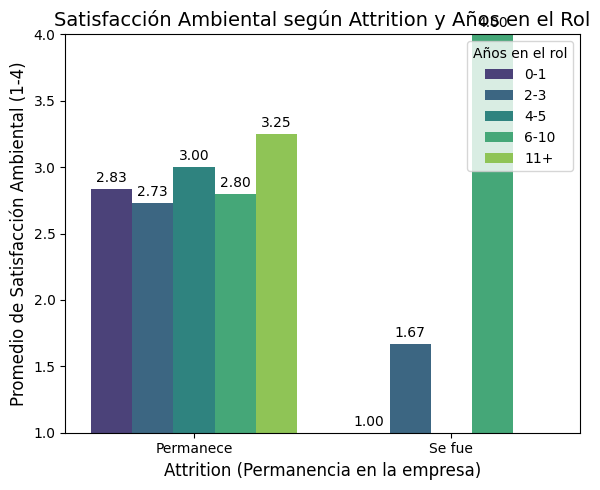

In [47]:
# Crear categorías por años en el rol
df['años_en_rol'] = pd.cut(
    df['yearsincurrentrole'],
    bins=[-1, 1, 3, 5, 10, df['yearsincurrentrole'].max()],
    labels=['0-1', '2-3', '4-5', '6-10', '11+']
)

# Filtrar y limpiar
df_role = df[['attrition', 'años_en_rol', 'environmentsatisfaction']].dropna()

# Crear gráfico
plt.figure(figsize=(6,5))
ax = sns.barplot(
    data=df_role,
    x='attrition',
    y='environmentsatisfaction',
    hue='años_en_rol',
    palette='viridis',
    errorbar=None
)

# Añadir etiquetas con valores a cada barra
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', padding=3)

# Etiquetas
ax.set_title("Satisfacción Ambiental según Attrition y Años en el Rol", fontsize=14)
ax.set_xlabel("Attrition (Permanencia en la empresa)", fontsize=12)
ax.set_ylabel("Promedio de Satisfacción Ambiental (1-4)", fontsize=12)
ax.legend(title='Años en el rol')
ax.set_ylim(1, 4)

plt.tight_layout()
plt.show()

A mayor antigüedad en el rol, mayor es la satisfacción ambiental, especialmente en quienes permanecen.

En quienes se fueron, algunos con muchos años reportan buena satisfacción, otros no.

El descontento puede acumularse a lo largo de los años si no se acompaña de crecimiento profesional

## SATISFACCIÓN RELACIONAL POR AÑOS EN EL PUESTO

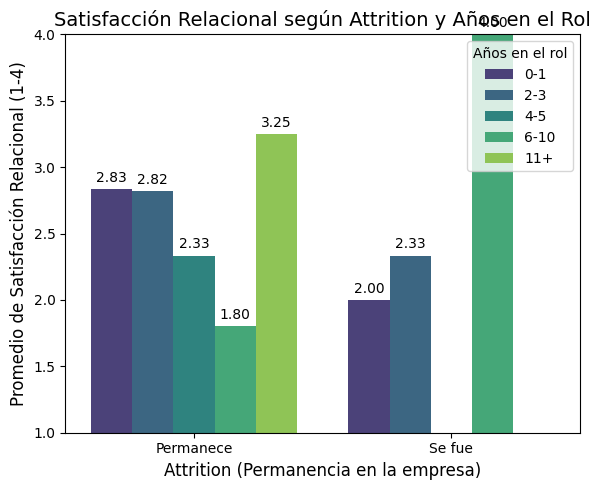

In [48]:
# Crear categorías por años en el rol
df['años_en_rol'] = pd.cut(
    df['yearsincurrentrole'],
    bins=[-1, 1, 3, 5, 10, df['yearsincurrentrole'].max()],
    labels=['0-1', '2-3', '4-5', '6-10', '11+']
)

# Filtrar y limpiar
df_role = df[['attrition', 'años_en_rol', 'relationshipsatisfaction']].dropna()

# Crear gráfico
plt.figure(figsize=(6,5))
ax = sns.barplot(
    data=df_role,
    x='attrition',
    y='relationshipsatisfaction',
    hue='años_en_rol',
    palette='viridis',
    errorbar=None
)

# Añadir etiquetas con valores a cada barra
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', padding=3)

# Etiquetas
ax.set_title("Satisfacción Relacional según Attrition y Años en el Rol", fontsize=14)
ax.set_xlabel("Attrition (Permanencia en la empresa)", fontsize=12)
ax.set_ylabel("Promedio de Satisfacción Relacional (1-4)", fontsize=12)
ax.legend(title='Años en el rol')
ax.set_ylim(1, 4)

plt.tight_layout()
plt.show()

Quienes tienen entre 6-10 años en el rol y permanecen, reportan la menor satisfacción relacional.

Algunos empleados con más de 11 años que se fueron reportan alta satisfacción relacional.

Esto podría deberse a otros factores (como oportunidades de crecimiento).

## SATISFACCIÓN AMBIENTAL POR AÑOS DESDE EL ÚLTIMO ASCENSO

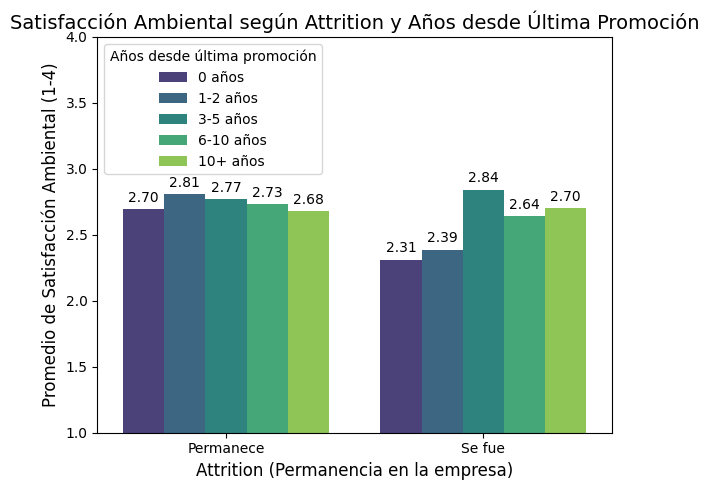

In [49]:
df['promotion_range'] = pd.cut(
    df['yearssincelastpromotion'],
    bins=[-1, 0, 2, 5, 10, df['yearssincelastpromotion'].max()],
    labels=['0 años', '1-2 años', '3-5 años', '6-10 años', '10+ años']
)

df_promo = df[['attrition', 'promotion_range', 'environmentsatisfaction']].dropna()


plt.figure(figsize=(6,5))
ax = sns.barplot(
    data=df_promo,
    x='attrition',
    y='environmentsatisfaction',
    hue='promotion_range',
    palette='viridis',
    errorbar=None
)

# Añadir etiquetas con valores a cada barra
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', padding=3)

ax.set_title("Satisfacción Ambiental según Attrition y Años desde Última Promoción", fontsize=14)
ax.set_xlabel("Attrition (Permanencia en la empresa)", fontsize=12)
ax.set_ylabel("Promedio de Satisfacción Ambiental (1-4)", fontsize=12)
ax.legend(title='Años desde última promoción')
ax.set_ylim(1, 4)  
plt.tight_layout()
plt.show()

Entre quienes permanecen, hay satisfacción pareja independiente a los años desde la última promoción.

Entre quienes se fueron, la satisfacción aumenta si han pasado 3-5 años desde la última promoción.

Una promoción relativamente reciente puede suavizar el descontento, incluso si luego se decide salir.

## SATISFACCIÓN RELACIONAL POR AÑOS DESDE EL ÚLTIMO ASCENSO

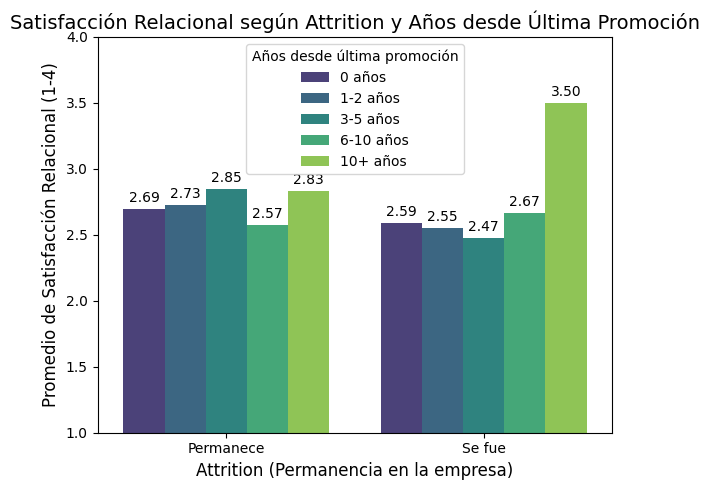

In [50]:
df['promotion_range'] = pd.cut(
    df['yearssincelastpromotion'],
    bins=[-1, 0, 2, 5, 10, df['yearssincelastpromotion'].max()],
    labels=['0 años', '1-2 años', '3-5 años', '6-10 años', '10+ años']
)

df_promo = df[['attrition', 'promotion_range', 'relationshipsatisfaction']].dropna()


plt.figure(figsize=(6,5))
ax = sns.barplot(
    data=df_promo,
    x='attrition',
    y='relationshipsatisfaction',
    hue='promotion_range',
    palette='viridis',
    errorbar=None
)


# Añadir etiquetas con valores a cada barra
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', padding=3)

ax.set_title("Satisfacción Relacional según Attrition y Años desde Última Promoción", fontsize=14)
ax.set_xlabel("Attrition (Permanencia en la empresa)", fontsize=12)
ax.set_ylabel("Promedio de Satisfacción Relacional (1-4)", fontsize=12)
ax.legend(title='Años desde última promoción')
ax.set_ylim(1, 4)  
plt.tight_layout()
plt.show()

Empleados recientemente ascendidos (0 años) muestran mayor satisfacción y tienden a permanecer más en la empresa.

A medida que aumentan los años sin promoción, la satisfacción disminuye levemente.

Los que se fueron tienden a agruparse en los rangos más largos sin promoción (6-10 y 10+ años), con una satisfacción más baja.

## SATISFACCIÓN AMBIENTAL POR TELETRABAJO

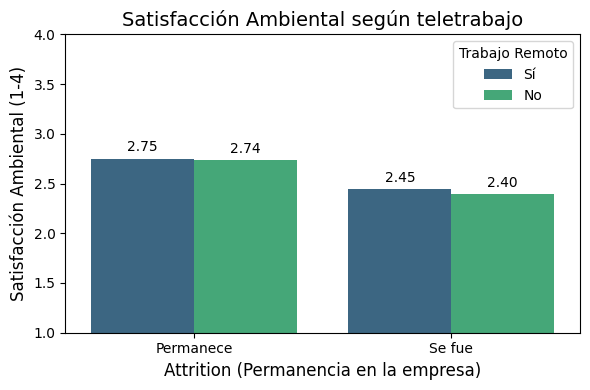

In [51]:
# Eliminar filas con nulos en columnas clave
df_remote = df[['attrition', 'remotework', 'environmentsatisfaction']].dropna()

# Crear el barplot
plt.figure(figsize=(6, 4))
ax = sns.barplot(
    data=df_remote,
    x='attrition',
    y='environmentsatisfaction',
    hue='remotework',
    palette='viridis',
    errorbar=None
)

# Añadir etiquetas con valores a cada barra
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', padding=3)

# Personalizar
ax.set_title("Satisfacción Ambiental según teletrabajo", fontsize=14)
ax.set_xlabel("Attrition (Permanencia en la empresa)", fontsize=12)
ax.set_ylabel("Satisfacción Ambiental (1-4)", fontsize=12)
ax.legend(title='Trabajo Remoto')
ax.set_ylim(1, 4)

plt.tight_layout()
plt.show()

El teletrabajo no tiene un impacto significativo en la satisfacción ambiental.

Los niveles son similares tanto para quienes tienen trabajo remoto como para quienes no.

## SATISFACCIÓN RELACIONAL POR TELETRABAJO

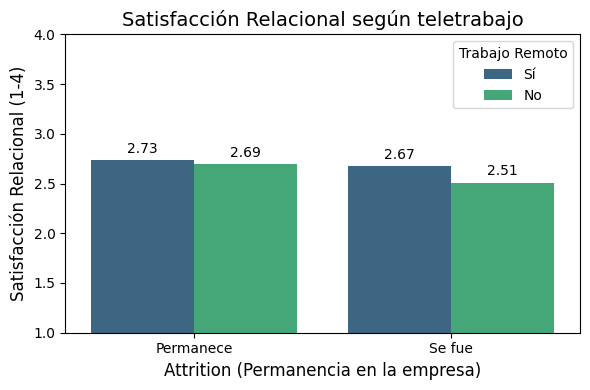

In [52]:
df_remote2 = df[['attrition', 'remotework', 'relationshipsatisfaction']].dropna()

plt.figure(figsize=(6, 4))
ax = sns.barplot(
    data=df_remote2,
    x='attrition',
    y='relationshipsatisfaction',
    hue='remotework',
    palette='viridis',
    errorbar=None
)

# Personalizar
ax.set_title("Satisfacción Relacional según teletrabajo", fontsize=14)
ax.set_xlabel("Attrition (Permanencia en la empresa)", fontsize=12)
ax.set_ylabel("Satisfacción Relacional (1-4)", fontsize=12)
ax.legend(title='Trabajo Remoto')
ax.set_ylim(1, 4)

# Añadir etiquetas con valores a cada barra
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', padding=3)


plt.tight_layout()
plt.show()

El trabajo remoto podría estar asociado con mayor satisfacción relacional, especialmente entre quienes permanecen.

La combinación de "no trabajar en remoto" y "haber dejado la empresa" muestra la peor satisfacción, lo que puede sugerir un posible factor de riesgo.

Esto podría apuntar a que el entorno de trabajo remoto mejora la percepción de relaciones interpersonales, o que los empleados con más autonomía y flexibilidad perciben mejor el ambiente relacional.

## SATISFACCIÓN AMBIENTAL POR TELETRABAJO

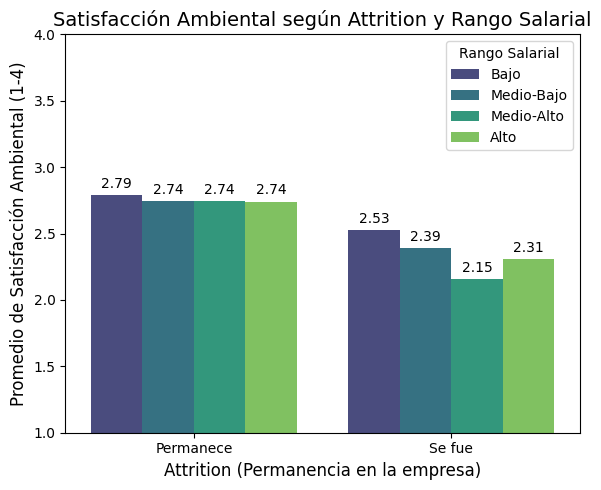

In [53]:
# Agrupar los salarios en 4 rangos (cuartiles)
df['salary_range'] = pd.qcut(df['salary'], q=4, labels=['Bajo', 'Medio-Bajo', 'Medio-Alto', 'Alto'])

# Eliminar filas con valores nulos en las columnas necesarias
df_salary = df[['attrition', 'salary_range', 'environmentsatisfaction']].dropna()

plt.figure(figsize=(6,5))
ax = sns.barplot(
    data=df_salary,
    x='attrition',
    y='environmentsatisfaction',
    hue='salary_range',
    palette='viridis',
    errorbar=None
)

# Añadir etiquetas con valores a cada barra
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', padding=3)

ax.set_title("Satisfacción Ambiental según Attrition y Rango Salarial", fontsize=14)
ax.set_xlabel("Attrition (Permanencia en la empresa)", fontsize=12)
ax.set_ylabel("Promedio de Satisfacción Ambiental (1-4)", fontsize=12)
ax.legend(title='Rango Salarial')
ax.set_ylim(1, 4)  # Fijamos los límites del eje Y para mejorar la comparación

plt.tight_layout()
plt.show()

Los empleados con salarios más bajos que permanecen muestran una satisfacción similar pero levemente superior a los de rango más alto.

Sin embargo, entre quienes se fueron, la satisfacción cae en todos los rangos, siendo más baja en el grupo de salario alto.

Esto podría sugerir que personas con mayores ingresos tienen más posibilidades de cambiar de empleo si no están satisfechas.

## SATISFACCIÓN RELACIONAL POR SALARIO

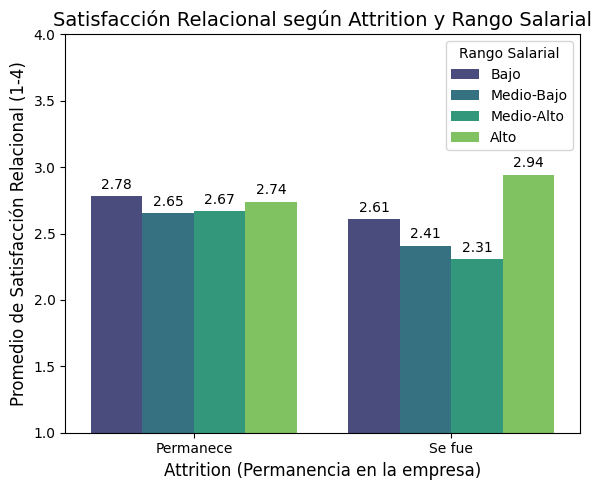

In [54]:
# Agrupar los salarios en 4 rangos (cuartiles)
df['salary_range'] = pd.qcut(df['salary'], q=4, labels=['Bajo', 'Medio-Bajo', 'Medio-Alto', 'Alto'])

# Eliminar filas con valores nulos en las columnas necesarias
df_salary = df[['attrition', 'salary_range', 'relationshipsatisfaction']].dropna()

plt.figure(figsize=(6,5))
ax = sns.barplot(
    data=df_salary,
    x='attrition',
    y='relationshipsatisfaction',
    hue='salary_range',
    palette='viridis',
    errorbar=None
)


# Añadir etiquetas con valores a cada barra
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', padding=3)

ax.set_title("Satisfacción Relacional según Attrition y Rango Salarial", fontsize=14)
ax.set_xlabel("Attrition (Permanencia en la empresa)", fontsize=12)
ax.set_ylabel("Promedio de Satisfacción Relacional (1-4)", fontsize=12)
ax.legend(title='Rango Salarial')
ax.set_ylim(1, 4)  # Fijamos los límites del eje Y para mejorar la comparación

plt.tight_layout()
plt.show()

El salario parece influir positivamente en la satisfacción relacional.

Los empleados con salario bajo y menor satisfacción son los más propensos a irse.

Es posible que una mejora salarial tenga un efecto indirecto positivo sobre el ambiente relacional, retención y bienestar.

# 📊 Resumen de Conclusiones e Insights
## 1. Alta Retención de Empleados
84.9% de los empleados siguen activos en la empresa.

Esto indica una buena estabilidad laboral, aunque sería interesante analizar los motivos de salida del 15.1% restante.

## 2. Teletrabajo como Práctica Común
61.7% de los empleados teletrabajan.

Esta política parece ya implementada de forma efectiva y podría seguir ampliándose para mejorar la calidad de vida.

## 3. Distancia al Trabajo
61.5% de los empleados viven a más de 5 millas del lugar de trabajo.

De ellos, un 60% teletrabaja, lo que sugiere que el teletrabajo está ayudando a mitigar los efectos de largas distancias.

## 4. Salario y Roles
Los Managers cobran significativamente más que otros puestos dentro de un mismo departamento.

El rol de Research Director también destaca por su alto salario.

## 5. Diferencias Salariales por Género
En general, los salarios son similares por género, excepto en Recursos Humanos, donde las mujeres ganan menos en promedio.

Esto puede reflejar una brecha salarial de género localizada.

## 6. Educación y Salario
Existe una relación directa: a mayor nivel educativo (escala del 1 al 5), mayor salario promedio.

## 7. Antigüedad y Retribución
16.5% de los empleados llevan más de 10 años en la empresa.

Este grupo es también el que mejor salario promedio tiene.

## 8. Entrenamiento y Desempeño
No se observa correlación significativa entre las sesiones de entrenamiento y el nivel de desempeño ni con el salario.

Esto sugiere que las formaciones actuales no están optimizando el rendimiento evaluado.

## 9. Experiencia Media por Género
Hombres y mujeres tienen experiencia similar (~11 años), por lo tanto, la antigüedad no explica diferencias salariales por género.

# 💡 Recomendaciones para la Empresa
## 1. Recoger Datos Más Contextuales
Incluir información como:

Número de hijos o personas a cargo, para evaluar políticas de conciliación familiar.

Fecha exacta de la recogida de datos, para facilitar comparativas interanuales y evolución temporal.

## 2. Auditoría Salarial
Realizar una revisión específica del departamento de Recursos Humanos para detectar posibles brechas salariales de género y aplicar planes correctivos si es necesario.

## 3. Evaluación de Formación
Revisar la efectividad del plan de formación:

Incluir feedback post-formación.

Medir el impacto en objetivos claros de rendimiento.

Establecer una correlación directa entre formación y promoción/desempeño.

## 4. Optimizar Políticas de Teletrabajo
Expandir las posibilidades de teletrabajo especialmente en los empleados que viven lejos y que actualmente no lo hacen.

Evaluar la posibilidad de crear un modelo híbrido flexible.

## 5. Planes de Desarrollo por Antigüedad
Aprovechar la experiencia del personal senior (>10 años) para programas de mentoría y transmisión de conocimiento.

Fomentar la retención de talento ofreciendo oportunidades de desarrollo y reconocimiento a medio-largo plazo.

## 6. Monitoreo Continuo
Establecer una política de actualización periódica de datos (por ejemplo, cada 6 o 12 meses).

Automatizar la recogida de métricas clave de RRHH (rotación, desempeño, clima laboral, etc.).